# Exercise 4.10 Instacart Grocery Basket Analysis Project (Part 1)

# 01. Importing libraries

In [5]:
# Import the libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [7]:
# Create a file path

path = r'/Users/vijaykasturi/Library/CloudStorage/OneDrive-Personal/Data Analytics Course - CareerFoundry/Data Immersion/A4/Instacart Basket Analysis'

In [8]:
# Import the merged file created in Part 1 from Prepared Data folder

df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_merged_4.9_part1.pkl'))

In [9]:
df_merged.head()

,user_id,First Name,Last Name,Gender,STATE,Age,No of Dependents,Marital Status,Annual Income,Unnamed: 0_x,...,busiest_day,daily_traffic_label,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,ord_freq,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443891,...,Regularly busy,Regular days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443892,...,Regularly busy,Regular days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443893,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443893,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443893,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both


# Part 1.2: Security implications for this data

The data contains First Name & Last Name of customers. While these by themselves are not sufficient to constitute as PII, when one takes them together with other data, such as "Gender", "Age" "State", "Annual Income", "Marital Status" and "No of Dependents", then we are skating on very thin ice with regards to Data privacy. 

In order to safeguard the customers' data privacy, it is advisable to drop the Names from the dataset. They do not form any useful information for our analysis, and we can use the rest of the non-PII data for customer profiling.

In [11]:
# Drop the columns First Name & Last Name from data set

df_merged= df_merged.drop(columns = ['First Name', 'Last Name'])

In [12]:
df_merged.head()

,user_id,Gender,STATE,Age,No of Dependents,Marital Status,Annual Income,Unnamed: 0_x,order_id,order_number,...,busiest_day,daily_traffic_label,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,ord_freq,frequency_flag,_merge
0,26711,Female,Missouri,48,3,married,165665,443891,518967,1,...,Regularly busy,Regular days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
1,26711,Female,Missouri,48,3,married,165665,443892,423547,2,...,Regularly busy,Regular days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
2,26711,Female,Missouri,48,3,married,165665,443893,2524893,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
3,26711,Female,Missouri,48,3,married,165665,443893,2524893,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both
4,26711,Female,Missouri,48,3,married,165665,443893,2524893,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both


# Part 1.3: Regional segmentation of the data

In [14]:
# Create a column "Region" based on "STATE" using Region classification from wikipedia

In [15]:
result = []
for reg in df_merged['STATE']:
    if reg in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey') :
        result.append('Northeast')
    
    elif reg in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri') :
        result.append('Midwest')
        
    elif reg in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana') :
        result.append('South')
        
    elif reg in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii') :
        result.append('West')
        
    else :
        result.append('No Region Applicable')

df_merged['Region']=result

In [16]:
df_merged['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [17]:
# Create a crosstab to compare spending habits in different regions using "Region" & "spending_flag"

crosstab = pd.crosstab (df_merged['Region'], df_merged['spending_flag'],dropna = False)
crosstab.to_clipboard()
print(crosstab)

spending_flag  High Spender  Low Spender
Region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559


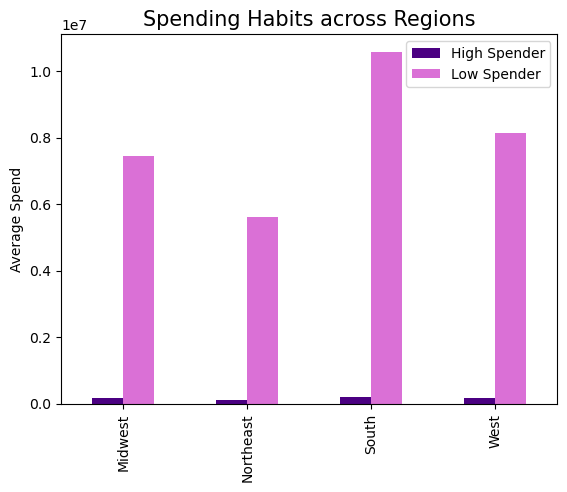

In [18]:
# Next we plot a bar chart using the crosstab

bar_color = ['indigo', 'orchid']
Bar_Spending = crosstab.plot.bar(color = bar_color)

plt.title("Spending Habits across Regions", fontsize = 15)
plt.xlabel(None)
plt.ylabel("Average Spend", fontsize = 10)
plt.legend(title = None)

# Low Spenders far outnumber High Spenders across the regions. South has the largest number of Low Spenders, followed by West, Midwest, and finally Northeast.

In [20]:
# Export the Visualization to Project folder

Bar_Spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_Spending_Habits.png'))

In [21]:
# Part 1.4: Excluding Customers with Low Activity

In [22]:
# Create a new column "Exclude" using a newly created Exclusion_flag (criteria max_order < 5)

df_merged.loc[df_merged['max_order'] < 5, 'Exclusion_flag'] = 'Exclude'
df_merged.loc[df_merged['max_order'] >= 5, 'Exclusion_flag'] = 'Keep'

In [23]:
df_merged['Exclusion_flag'].value_counts()

Exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [24]:
# Export Excluded Customers

df_excl = df_merged[df_merged['Exclusion_flag'] == 'Exclude']
df_excl.to_pickle(os.path.join(path, '05 Sent to Client', 'excl_cust.pkl'))

In [25]:
df_excl.head()

,user_id,Gender,STATE,Age,No of Dependents,Marital Status,Annual Income,Unnamed: 0_x,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,ord_freq,frequency_flag,_merge,Region,Exclusion_flag
729,168851,Male,South Carolina,30,0,single,63712,2798786,1903574,1,...,Average orders,3,New customer,7.485714,Low Spender,15.0,Regular Customer,both,South,Exclude
730,168851,Male,South Carolina,30,0,single,63712,2798786,1903574,1,...,Average orders,3,New customer,7.485714,Low Spender,15.0,Regular Customer,both,South,Exclude
731,168851,Male,South Carolina,30,0,single,63712,2798786,1903574,1,...,Average orders,3,New customer,7.485714,Low Spender,15.0,Regular Customer,both,South,Exclude
732,168851,Male,South Carolina,30,0,single,63712,2798787,1193140,2,...,Most orders,3,New customer,7.485714,Low Spender,15.0,Regular Customer,both,South,Exclude
733,168851,Male,South Carolina,30,0,single,63712,2798787,1193140,2,...,Most orders,3,New customer,7.485714,Low Spender,15.0,Regular Customer,both,South,Exclude


In [26]:
# Create dataset excluding low-activity customers

df_merged_new = df_merged[df_merged['Exclusion_flag'] == 'Keep']

In [27]:
df_merged_new.head()

,user_id,Gender,STATE,Age,No of Dependents,Marital Status,Annual Income,Unnamed: 0_x,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,ord_freq,frequency_flag,_merge,Region,Exclusion_flag
0,26711,Female,Missouri,48,3,married,165665,443891,518967,1,...,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,Keep
1,26711,Female,Missouri,48,3,married,165665,443892,423547,2,...,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,Keep
2,26711,Female,Missouri,48,3,married,165665,443893,2524893,3,...,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,Keep
3,26711,Female,Missouri,48,3,married,165665,443893,2524893,3,...,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,Keep
4,26711,Female,Missouri,48,3,married,165665,443893,2524893,3,...,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,Keep


In [28]:
# Drop column "Exclusion_flag" from new dataset as it is not needed anymore

df_merged_new.drop(columns = ['Exclusion_flag'])

,user_id,Gender,STATE,Age,No of Dependents,Marital Status,Annual Income,Unnamed: 0_x,order_id,order_number,...,daily_traffic_label,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,ord_freq,frequency_flag,_merge,Region
0,26711,Female,Missouri,48,3,married,165665,443891,518967,1,...,Regular days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest
1,26711,Female,Missouri,48,3,married,165665,443892,423547,2,...,Regular days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest
2,26711,Female,Missouri,48,3,married,165665,443893,2524893,3,...,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest
3,26711,Female,Missouri,48,3,married,165665,443893,2524893,3,...,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest
4,26711,Female,Missouri,48,3,married,165665,443893,2524893,3,...,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404813,135902,Female,Missouri,66,2,married,53374,2256474,2498530,8,...,Regular days,Average orders,8,New customer,6.960345,Low Spender,8.0,Frequent Customer,both,Midwest
32404814,135902,Female,Missouri,66,2,married,53374,2256474,2498530,8,...,Regular days,Average orders,8,New customer,6.960345,Low Spender,8.0,Frequent Customer,both,Midwest
32404815,135902,Female,Missouri,66,2,married,53374,2256474,2498530,8,...,Regular days,Average orders,8,New customer,6.960345,Low Spender,8.0,Frequent Customer,both,Midwest
32404816,135902,Female,Missouri,66,2,married,53374,2256474,2498530,8,...,Regular days,Average orders,8,New customer,6.960345,Low Spender,8.0,Frequent Customer,both,Midwest


In [29]:
# Export Lastest dataset

df_merged_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_data_new_4.10.pkl'))

# Part 1.5 Customer Profiling for marketing and business strategy units

In [31]:
# 1. Create a Profiling Variable (Age Group) based on Age

df_merged_new.loc[df_merged_new['Age'] > 60 ,'Age Group'] = 'Boomer'
df_merged_new.loc[(df_merged_new['Age'] <= 60) & (df_merged_new['Age'] > 40) ,'Age Group'] = 'Gen-X'
df_merged_new.loc[(df_merged_new['Age'] <= 40) & (df_merged_new['Age'] > 25) ,'Age Group'] = 'Millennial'
df_merged_new.loc[df_merged_new['Age'] <= 25 ,'Age Group'] = 'Gen-Y'

/var/folders/73/ncnyv2zs7tlgp3vnng5pbtv00000gn/T/ipykernel_45327/2858201841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_new.loc[df_merged_new['Age'] > 60 ,'Age Group'] = 'Boomer'


In [32]:
df_merged_new['Age Group'].value_counts()

Age Group
Boomer        10112607
Gen-X          9703524
Millennial     7283915
Gen-Y          3864518
Name: count, dtype: int64

In [33]:
# 2. Create a Profiling Variable (Income Group) based on Annual Income

df_merged_new.loc[df_merged_new['Annual Income'] > 100000 ,'Income Group'] = 'High Income'
df_merged_new.loc[(df_merged_new['Annual Income'] <= 100000) & (df_merged_new['Annual Income'] > 50000) ,'Income Group'] = 'Middle Income'
df_merged_new.loc[df_merged_new['Annual Income'] <= 50000 ,'Income Group'] = 'Low Income'

/var/folders/73/ncnyv2zs7tlgp3vnng5pbtv00000gn/T/ipykernel_45327/1337453101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_new.loc[df_merged_new['Annual Income'] > 100000 ,'Income Group'] = 'High Income'


In [34]:
df_merged_new['Income Group'].value_counts()

Income Group
High Income      14207028
Middle Income    13394982
Low Income        3362554
Name: count, dtype: int64

In [75]:
# 3. Create a Profiling Variable "Demographic" to determine "Single Adult" or "Young Parent" based on Age & No of Dependents (and purchases in "babies" department)

df_merged_new.loc[(df_merged_new['Age'] < 25) & (df_merged_new['No of Dependents'] == 0) ,'Demographic'] = 'Single Adult'
df_merged_new.loc[(df_merged_new['Age'] >= 25) & (df_merged_new['Age'] < 35) & (df_merged_new['No of Dependents'] > 0) & (df_merged_new['department_id'] == 18) ,'Demographic'] = 'Young Parent'
df_merged_new.loc[(df_merged_new['Age'] > 35) ,'Demographic'] = 'Other'

In [77]:
df_merged_new['Demographic'].value_counts()

Demographic
Other           22225759
Young Parent     3589053
Single Adult      825510
Name: count, dtype: int64

# Part 1.6 Creating Visualizations for the Profiles

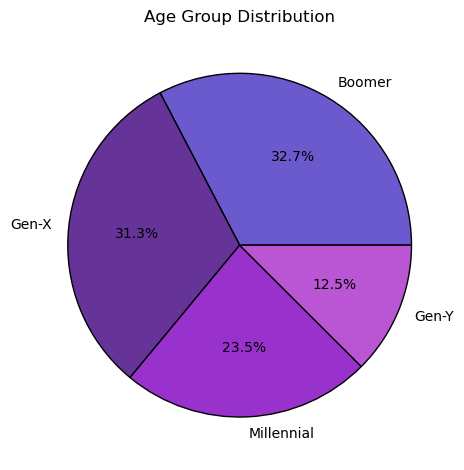

In [103]:
# 1. Customer Base by Age Group

Age_Group = df_merged_new['Age Group'].value_counts()

pie_color = ['slateblue', 'rebeccapurple', 'darkorchid', 'mediumorchid']
Pie_Age_Group = Age_Group.plot.pie(autopct='%1.1f%%', wedgeprops={'edgecolor':'black'}, colors = pie_color)
plt.title('Age Group Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

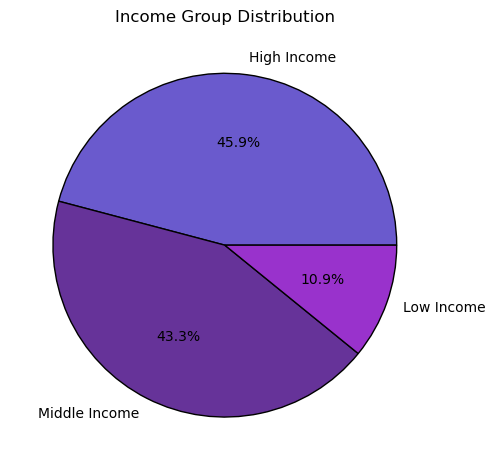

In [105]:
# 2. Customer Income Profile

Inc_Group = df_merged_new['Income Group'].value_counts()

pie_color = ['slateblue', 'rebeccapurple', 'darkorchid',]
Pie_Income_Group = Inc_Group.plot.pie(autopct='%1.1f%%', wedgeprops={'edgecolor':'black'}, colors = pie_color)
plt.title('Income Group Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

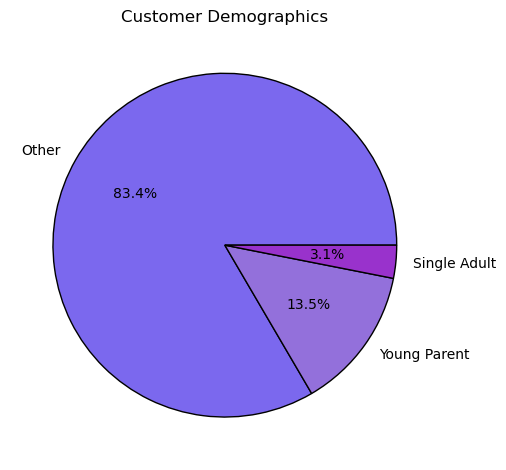

In [109]:
# 3. Customer Demographics

Demo = df_merged_new['Demographic'].value_counts()

pie_color = ['mediumslateblue', 'mediumpurple', 'darkorchid',]
Pie_Demographics = Demo.plot.pie(autopct='%1.1f%%', wedgeprops={'edgecolor':'black'}, colors = pie_color)
plt.title('Customer Demographics')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [111]:
# Export the Visualizations

Pie_Age_Group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie_Age_Group.png'))
Pie_Income_Group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie_Income_Group.png'))
Pie_Demographics.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie_Cust_Demographics.png'))

# Part 1.7 Statistical Analysis: Aggregate the max, mean, and min variables for usage frequency and expenditure.

In [115]:
# Rename Relevant Columns

df_merged_new.rename(columns = {'prices' : 'Total Expenditure'}, inplace = True)
df_merged_new.rename(columns = {'days_since_prior_order' : 'Order Frequency'}, inplace = True)

/var/folders/73/ncnyv2zs7tlgp3vnng5pbtv00000gn/T/ipykernel_45327/440774634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_new.rename(columns = {'prices' : 'Total Expenditure'}, inplace = True)
/var/folders/73/ncnyv2zs7tlgp3vnng5pbtv00000gn/T/ipykernel_45327/440774634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_new.rename(columns = {'days_since_prior_order' : 'Order Frequency'}, inplace = True)


In [119]:
# 1. Profile: By Customer Age Group

AG = df_merged_new.groupby('Age Group').agg({'Order Frequency':['mean','min','max'],'Total Expenditure':['mean','min','max']})
AG

Order Frequency            Total Expenditure              
                      mean  min   max              mean  min      max
Age Group                                                            
Boomer           10.587844  0.0  30.0         11.806149  1.0  99999.0
Gen-X            10.620596  0.0  30.0         11.894440  1.0  99999.0
Gen-Y            10.594659  0.0  30.0         12.209359  1.0  99999.0
Millennial       10.617240  0.0  30.0         12.016075  1.0  99999.0

In [121]:
# 2. Profile: By Customer Income Group

IG = df_merged_new.groupby('Income Group').agg({'Order Frequency':['mean','min','max'],'Total Expenditure':['mean','min','max']})
IG

Order Frequency            Total Expenditure              
                         mean  min   max              mean  min      max
Income Group                                                            
High Income         10.569025  0.0  30.0         16.461733  1.0  99999.0
Low Income          10.934052  0.0  30.0          6.707347  1.0     25.0
Middle Income       10.562572  0.0  30.0          8.442726  1.0  99999.0

In [125]:
# 3. Profile: By Customer Demographics 

Demo = df_merged_new.groupby('Demographic').agg({'Order Frequency':['mean','min','max'],'Total Expenditure':['mean','min','max']})
Demo

Order Frequency            Total Expenditure              
                        mean  min   max              mean  min      max
Demographic                                                            
Other              10.598792  0.0  30.0         11.874233  1.0  99999.0
Single Adult       10.726613  0.0  30.0         13.562786  1.0  99999.0
Young Parent       10.660138  0.0  30.0         12.132091  1.0  99999.0

In [129]:
# 4. Profile: By Loyalty

Loyal = df_merged_new.groupby('loyalty_flag').agg({'Order Frequency':['mean','min','max'],'Total Expenditure':['mean','min','max']})
Loyal

Order Frequency            Total Expenditure              
                            mean  min   max              mean  min      max
loyalty_flag                                                               
Loyal customer          6.044517  0.0  30.0         10.386336  1.0  99999.0
New customer           16.103911  0.0  30.0         13.387725  1.0  99999.0
Regular customer       11.896974  0.0  30.0         12.495717  1.0  99999.0

In [133]:
# 5. Profile: By Spending

Spend = df_merged_new.groupby('spending_flag').agg({'Order Frequency':['mean','min','max'],'Total Expenditure':['mean','min','max']})
Spend

Order Frequency            Total Expenditure              
                         mean  min   max              mean  min      max
spending_flag                                                           
High Spender        10.311450  0.0  30.0        220.821561  1.0  99999.0
Low Spender         10.611725  0.0  30.0          7.781890  1.0     25.0

# Part 1.8: Identifying Customer Behaviour across Regions & Departments

In [149]:
# Import the Departments data from Prepared Data folder

df_dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)
df_dept.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [151]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [155]:
# Merge Departments data with current dataset

df_merged_new.rename(columns ={'_merge' : 'old_merge_indicator'}, inplace = True)
df_merged_dept = df_merged_new.merge(df_dept, on = 'department_id', how = 'left', indicator = True)

/var/folders/73/ncnyv2zs7tlgp3vnng5pbtv00000gn/T/ipykernel_45327/4058781490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_new.rename(columns ={'_merge' : 'old_merge_indicator'}, inplace = True)


In [156]:
df_merged_dept.head()

,user_id,Gender,STATE,Age,No of Dependents,Marital Status,Annual Income,Unnamed: 0_x,order_id,order_number,...,ord_freq,frequency_flag,old_merge_indicator,Region,Exclusion_flag,Age Group,Income Group,Demographic,department,_merge
0,26711,Female,Missouri,48,3,married,165665,443891,518967,1,...,19.0,Regular Customer,both,Midwest,Keep,Gen-X,High Income,Other,produce,both
1,26711,Female,Missouri,48,3,married,165665,443892,423547,2,...,19.0,Regular Customer,both,Midwest,Keep,Gen-X,High Income,Other,dairy eggs,both
2,26711,Female,Missouri,48,3,married,165665,443893,2524893,3,...,19.0,Regular Customer,both,Midwest,Keep,Gen-X,High Income,Other,dairy eggs,both
3,26711,Female,Missouri,48,3,married,165665,443893,2524893,3,...,19.0,Regular Customer,both,Midwest,Keep,Gen-X,High Income,Other,produce,both
4,26711,Female,Missouri,48,3,married,165665,443893,2524893,3,...,19.0,Regular Customer,both,Midwest,Keep,Gen-X,High Income,Other,produce,both


In [159]:
df_merged_dept['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

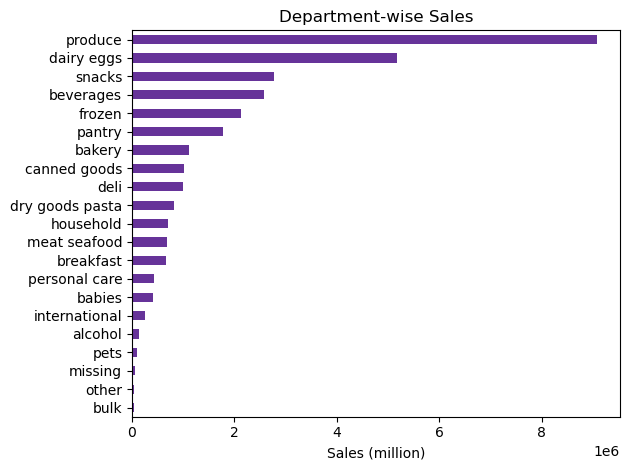

In [201]:
# 1. Create a Sales Chart by Department 

dept_bar = df_merged_dept['department'].value_counts().sort_values(ascending= True).plot.barh(color = 'rebeccapurple')
plt.title('Department-wise Sales')
plt.xlabel('Sales (million)')
plt.ylabel(None)
plt.tight_layout()

In [173]:
# Export the Visualization

dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_Department_Sales.png'))

In [203]:
# 2. Customer Profile by Region (Age Group)

age_region = pd.crosstab(df_merged_dept['Age Group'],df_merged_dept['Region'],dropna = False)

In [204]:
age_region

Region,Midwest,Northeast,South,West
Age Group,,,,
Boomer,2356770,1809013,3361229,2585595
Gen-X,2313539,1701787,3174882,2513316
Gen-Y,898155,679909,1314989,971465
Millennial,1693049,1273976,2460039,1856851


Text(0.5, 0, '')

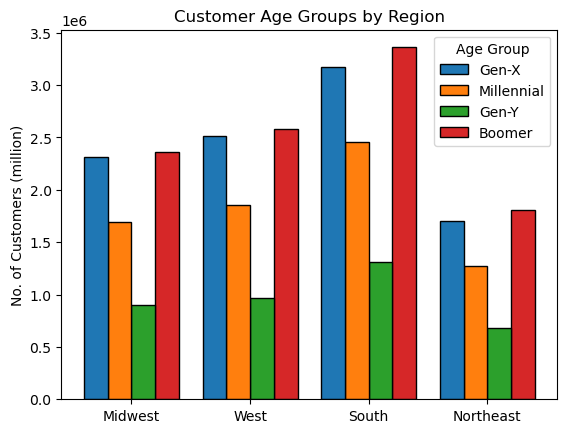

In [207]:
# Create a Histogram with crosstab data

plot_color = ['slateblue', 'rebeccapurple', 'darkorchid', 'mediumorchid']
Hist_Age_Region = sns.histplot(data=df_merged_dept, x = 'Region', hue = 'Age Group', multiple='dodge', color = plot_color, shrink=.8, alpha=1)

plt.title('Customer Age Groups by Region')
plt.ylabel('No. of Customers (million)')
plt.xlabel(None)

In [215]:
# Export the Visualization

Hist_Age_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Histogram_Age_Region.png'))

In [209]:
# 3. Customer Profile by Region (Income Group)

income_region = pd.crosstab(df_merged_dept['Income Group'],df_merged_dept['Region'],dropna = False)

In [223]:
income_region

Region,Midwest,Northeast,South,West
Income Group,,,,
High Income,3400093,2516484,4663571,3626880
Low Income,783764,587137,1142572,849081
Middle Income,3077656,2361064,4504996,3451266


Text(0.5, 0, '')

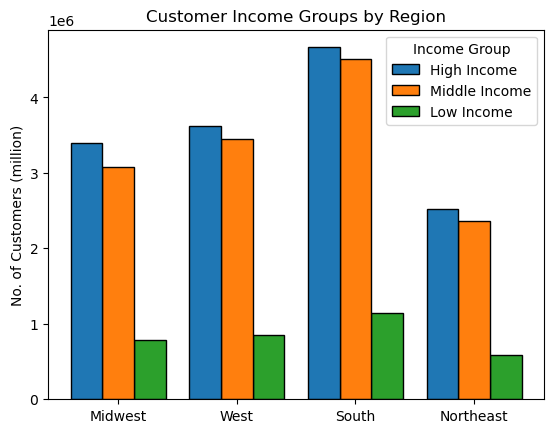

In [213]:
# Create a Histogram with crosstab data

plot_color = ['slateblue', 'rebeccapurple', 'darkorchid', 'mediumorchid']
Hist_Income_Region = sns.histplot(data=df_merged_dept, x = 'Region', hue = 'Income Group', multiple='dodge', color = plot_color, shrink=.8, alpha=1)

plt.title('Customer Income Groups by Region')
plt.ylabel('No. of Customers (million)')
plt.xlabel(None)

In [217]:
# Export the Visualization

Hist_Income_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Histogram_Income_Region.png'))

In [227]:
# 4. Customer Profile by Region (Income Group)

demo_region = pd.crosstab(df_merged_dept['Demographic'],df_merged_dept['Region'],dropna = True)

In [228]:
demo_region

Region,Midwest,Northeast,South,West
Demographic,,,,
Other,5243102,3913211,7360728,5708718
Single Adult,182605,150126,289285,203494
Young Parent,836080,631959,1197627,923387


Text(0.5, 0, '')

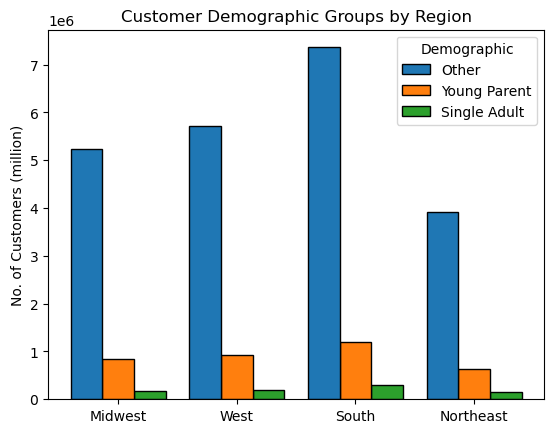

In [221]:
# Create a Histogram with crosstab data

plot_color = ['slateblue', 'rebeccapurple', 'darkorchid', 'mediumorchid']
Hist_Demo_Region = sns.histplot(data=df_merged_dept, x = 'Region', hue = 'Demographic', multiple='dodge', color = plot_color, shrink=.8, alpha=1)

plt.title('Customer Demographic Groups by Region')
plt.ylabel('No. of Customers (million)')
plt.xlabel(None)

In [231]:
# Export the Visualization

Hist_Demo_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Histogram_Demographic_Region.png'))

In [235]:
# 5. Region-wise Sales by Department

dept_region = pd.crosstab(df_merged_dept['department'],df_merged_dept['Region'],dropna = True)

In [236]:
dept_region

Region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


Text(0.5, 0, 'Sales (million)')

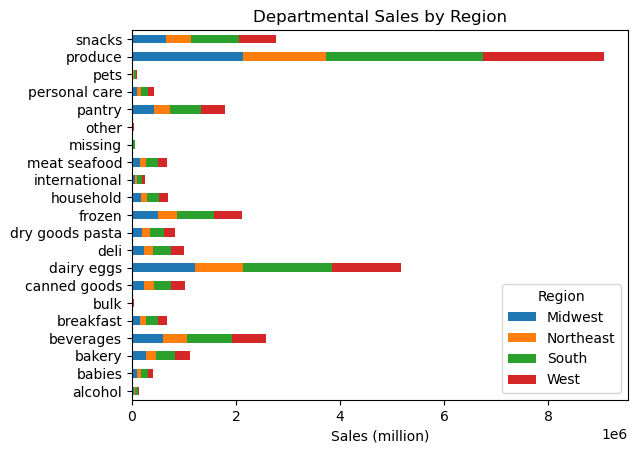

In [246]:
# Create a Histogram with crosstab data

plot_color = ['slateblue', 'rebeccapurple', 'darkorchid', 'mediumorchid']
StBar_Dept_Region = dept_region.plot.barh(stacked =True)

plt.title('Departmental Sales by Region')
plt.ylabel(None)
plt.xlabel('Sales (million)')

In [248]:
# Export the Visualization

StBar_Dept_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'StBar_Department_Region.png'))

In [256]:
# 6. Customer Profile by Department (Age Group)

Age_Dept = pd.crosstab(df_merged_dept['department'],df_merged_dept['Age Group'],dropna = True)

In [274]:
Age_Dept

Age Group,Boomer,Gen-X,Gen-Y,Millennial
department,,,,
alcohol,45628,45188,19188,34623
babies,133019,129709,51234,96430
bakery,366017,352313,139873,262625
beverages,844687,811805,318343,597066
breakfast,217539,211277,85477,156557
bulk,10929,10419,4306,7797
canned goods,329485,316767,126312,239510
dairy eggs,1687944,1616891,647493,1224854
deli,328967,313495,124555,236817


Text(0.5, 0, 'Sales (million)')

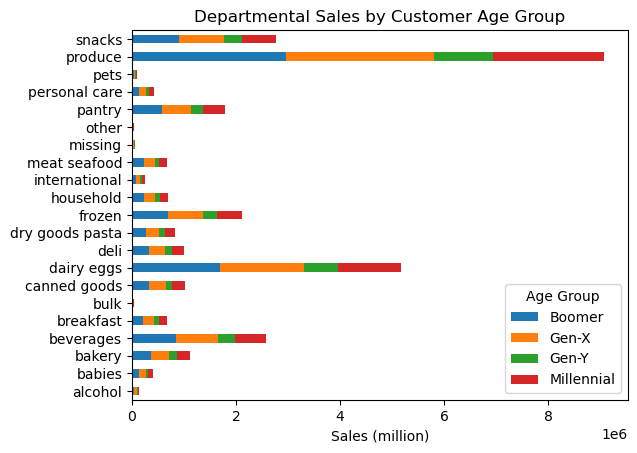

In [258]:
# Create a Histogram with crosstab data

plot_color = ['slateblue', 'rebeccapurple', 'darkorchid', 'mediumorchid']
StBar_Age_Dept = Age_Dept.plot.barh(stacked =True)

plt.title('Departmental Sales by Customer Age Group')
plt.ylabel(None)
plt.xlabel('Sales (million)')

In [260]:
# Export the Visualization

StBar_Age_Dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'StBar_Age_Department.png'))

In [278]:
# 7. Customer Profile by Department (Income Group)

Income_Dept = pd.crosstab(df_merged_dept['department'],df_merged_dept['Income Group'],dropna = True)

In [280]:
Income_Dept

Income Group,High Income,Low Income,Middle Income
department,,,
alcohol,69142,18047,57438
babies,196696,29240,184456
bakery,527703,106757,486368
beverages,1126437,383121,1062343
breakfast,297594,91408,281848
bulk,14218,4676,14557
canned goods,485226,78975,447873
dairy eggs,2406160,502363,2268659
deli,462089,106448,435297


Text(0.5, 0, 'Sales (million)')

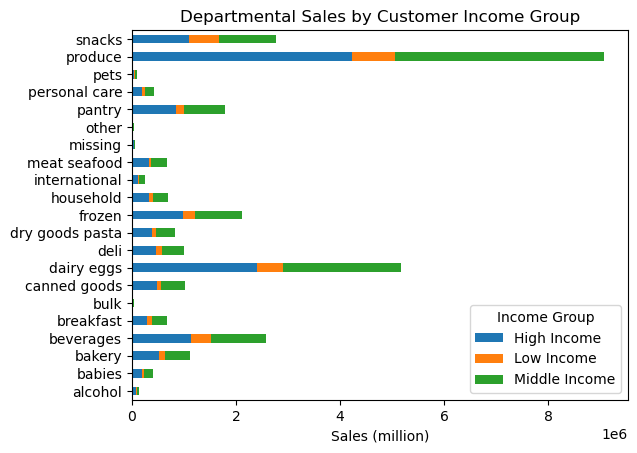

In [282]:
# Create a Histogram with crosstab data

plot_color = ['slateblue', 'rebeccapurple', 'darkorchid', 'mediumorchid']
StBar_Inc_Dept = Income_Dept.plot.barh(stacked =True)

plt.title('Departmental Sales by Customer Income Group')
plt.ylabel(None)
plt.xlabel('Sales (million)')

In [284]:
# Export the Visualization

StBar_Inc_Dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'StBar_Income_Department.png'))

In [286]:
# 8. Customer Profile by Department (Demographic)

Demo_Dept = pd.crosstab(df_merged_dept['department'],df_merged_dept['Demographic'],dropna = True)

In [290]:
Demo_Dept

Demographic,Other,Single Adult,Young Parent
department,,,
alcohol,102242,3930,17009
babies,296927,11223,44975
bakery,803797,30038,129502
beverages,1854511,68889,295746
breakfast,479433,17466,77706
bulk,23827,875,3956
canned goods,724895,26631,118333
dairy eggs,3705656,138060,605806
deli,719971,26405,115807


Text(0.5, 0, 'Sales (million)')

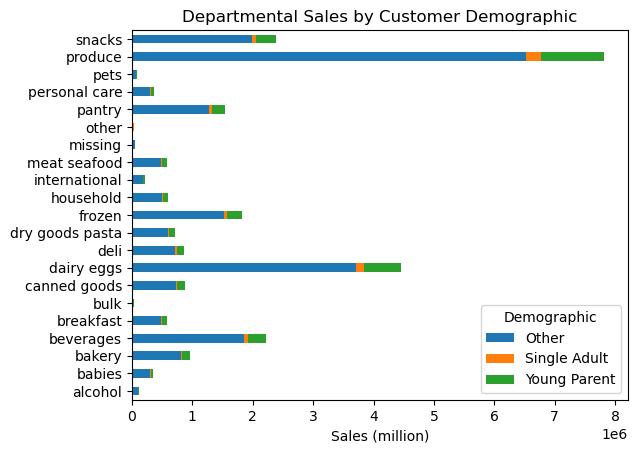

In [292]:
# Create a Histogram with crosstab data

plot_color = ['slateblue', 'rebeccapurple', 'darkorchid', 'mediumorchid']
StBar_Demo_Dept = Demo_Dept.plot.barh(stacked =True)

plt.title('Departmental Sales by Customer Demographic')
plt.ylabel(None)
plt.xlabel('Sales (million)')

In [294]:
# Export the Visualization

StBar_Demo_Dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'StBar_Demographic_Department.png'))

# Part 1.10 Export the final data set

In [302]:
# Export Final Data Set to Prepared Data folder

df_merged_dept.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_project_dataset_4.10.pkl'))

# End of Exercise 4.10 Part 1

# Additional Analysis & Visualizations to answer Key Project Questions

In [306]:
df_merged_dept.dtypes

user_id                    object
Gender                     object
STATE                      object
Age                         int64
No of Dependents            int64
Marital Status             object
Annual Income               int64
Unnamed: 0_x                int64
order_id                   object
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
Order Frequency           float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
old_merge_ind            category
Unnamed: 0_y                int64
product_name               object
aisle_id                    int64
department_id               int64
Total Expenditure         float64
old_merge_ind_2          category
price_range_loc            object
busiest_day                object
daily_traffic_label        object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
avg_price     

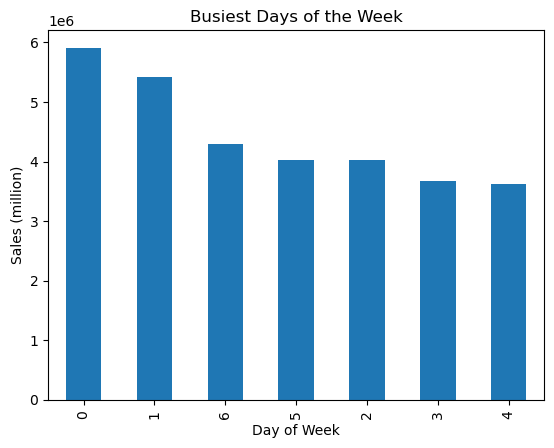

In [322]:
# 1. Busiest days of the week

Bar_Busiest_days = df_merged_dept['orders_day_of_week'].value_counts().plot.bar()
plt.title('Busiest Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales (million)')

Bar_Busiest_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_Busiest_days.png'))

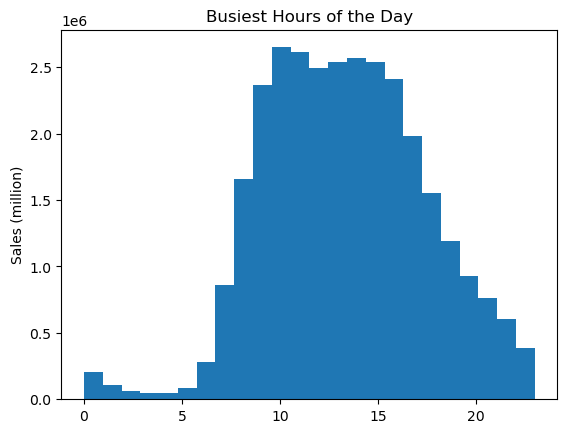

In [330]:
# 2. Busiest hours of the day

Hist_Busiest_Hours = df_merged_dept['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Busiest Hours of the Day')
plt.xlabel(None)
plt.ylabel('Sales (million)')

Hist_Busiest_Hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Hist_Busiest_Hours.png'))

# End of Activity. Notebook Saved.